In [1]:
import numpy as np
from numpy import sin, cos, sqrt, pi
import matplotlib.pyplot as plt

In [2]:
#CONSTANTES DEL SISTEMA
w0 = 1/pi # FRECUENCIA DEL TIEMPO TAO
U = 0.1/w0 # FRECUENCIA DE RABI
w1 = 100/w0 # FRECUENCIA DE LARMOR DEL PRIMER QUBIT
w2 = 200/w0 # FRECUENCIA DE LARMOR DEL SEGUNDO QUBIT
w3 = 300/w0 # FRECUENCIA DE LARMOR DEL TERCER QUBIT
J = 5.0/w0 # FACTOR DE INTERACCION ENTRE PRIMEROS VECINOS (FRECUENCIA)
Jp = 0.8/w0 # FACTOR DE INTERACCION ENTRE SEGUNDOS VECINOS (FRECUENCIA)

phi = 0.0 # FASE DEL CAMPO MAGNETICO

In [3]:
# Algoritmo de teleportación cuántica 3qbits

pp = pi/U #PI PULSO
hpp = pi/(2*U)# PI MEDIO PULSO
h = 0.001 # TAMANHO DE PASO

# DELIMITACIONES DEL METODO NUMERICO.
ti  = 0       
# TIEMPO INICIAL: siempre cero 
tf1 = hpp       
tf2 = tf1 + hpp    
tf3 = tf2 + pp      
tf4 = tf3 + pp      
tf5 = tf4 + hpp     
tf6 = tf5 + hpp 
tf7 = tf6 + hpp 
tf8 = tf7 + hpp 
tf  = tf8 + hpp   

n = int((tf - ti)/h) # NUMERO DE ITERACIONES TOTALES PARA EL CODIGO

In [4]:
# ENERGIA DEL SISTEMA POR CADA UNIDAD h-BARRA.
E_hbar = lambda a3, a2, a1: (-1/2)*(w1*((-1)**a1) + w2*((-1)**a2) + w3*((-1)**a3) + 0.5*J*( ( (-1)**(a1+a2) ) + ( (-1)**(a2+a3) ) ) + 0.5*Jp*( (-1)**(a1+a3) ) )
E = np.zeros(8)
E[0] = E_hbar(0,0,0) #ENERGIA DEL ESTADO 000
E[1] = E_hbar(0,0,1) #ENERGIA DEL ESTADO 001
E[2] = E_hbar(0,1,0) #ENERGIA DEL ESTADO 010
E[3] = E_hbar(0,1,1) #ENERGIA DEL ESTADO 011
E[4] = E_hbar(1,0,0) #ENERGIA DEL ESTADO 100
E[5] = E_hbar(1,0,1) #ENERGIA DEL ESTADO 101
E[6] = E_hbar(1,1,0) #ENERGIA DEL ESTADO 110
E[7] = E_hbar(1,1,1) #ENERGIA DEL ESTADO 111

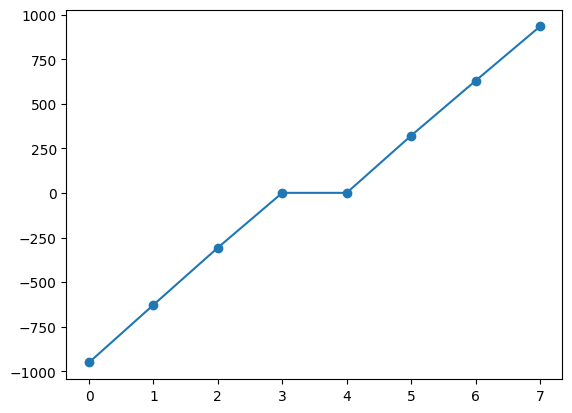

In [5]:
plt.plot(E, marker='o')

In [6]:
W_kj = lambda i, j: ( (E[i-1] - E[j-1]) )#/w0
Wij = lambda i, j: ( (E[i-1] - E[j-1]) )#/w0
#Wij = lambda i, j: (E[i-1] - E[j-1])


In [7]:
w = Wij(5,1)

In [8]:
theta = lambda t, w_mag: w_mag*t + phi # Angulo del campo magnetico
B = lambda w_mag, t, i, j : Wij(i,j)*t + theta(t, w_mag)

In [9]:
# ARREGLOS PARA SOLUCION NUMERICA

vX1, vY1 = np.zeros(n), np.zeros(n)
vX2, vY2 = np.zeros(n), np.zeros(n)
vX3, vY3 = np.zeros(n), np.zeros(n)
vX4, vY4 = np.zeros(n), np.zeros(n)
vX5, vY5 = np.zeros(n), np.zeros(n)
vX6, vY6 = np.zeros(n), np.zeros(n)
vX7, vY7 = np.zeros(n), np.zeros(n)
vX8, vY8 = np.zeros(n), np.zeros(n)
cX1, cY1 = np.zeros(n), np.zeros(n)
cX2, cY2 = np.zeros(n), np.zeros(n)
cX3, cY3 = np.zeros(n), np.zeros(n)
cX4, cY4 = np.zeros(n), np.zeros(n)
cX5, cY5 = np.zeros(n), np.zeros(n)
cX6, cY6 = np.zeros(n), np.zeros(n)
cX7, cY7 = np.zeros(n), np.zeros(n)
cX8, cY8 = np.zeros(n), np.zeros(n)

D1 = np.zeros(n)
D2 = np.zeros(n)
D3 = np.zeros(n)
D4 = np.zeros(n)
D5 = np.zeros(n)
D6 = np.zeros(n)
D7 = np.zeros(n)
D8 = np.zeros(n)
N = np.zeros(n)
T = np.zeros(n)


In [10]:
# CONDICIONES INICIALES DEL SISTEMA DE ECUACIONES DEL MARCO DE INTERACCION
# Nota: tambien cumplen con las condiciones de la funcion de onda

vX1[0], vY1[0] = sqrt(2/10), 0
vX2[0], vY2[0] = 0, 0
vX3[0], vY3[0] = 0, 0
vX4[0], vY4[0] = 0, 0
vX5[0], vY5[0] = sqrt(8/10), 0
vX6[0], vY6[0] = 0, 0
vX7[0], vY7[0] = 0, 0
vX8[0], vY8[0] = 0, 0


# CONDICIONES INICIALES DEL SISTEMA DE ECUACIONES DE LA FUNCION DE ONDA
cX1[0], cY1[0] = vX1[0], vY1[0]
cX2[0], cY2[0] = vX2[0], vY2[0]
cX3[0], cY3[0] = vX3[0], vY3[0]
cX4[0], cY4[0] = vX4[0], vY4[0]
cX5[0], cY5[0] = vX5[0], vY5[0]
cX6[0], cY6[0] = vX6[0], vY6[0]
cX7[0], cY7[0] = vX7[0], vY7[0]
cX8[0], cY8[0] = vX8[0], vY8[0]


In [11]:
# SISTEMA DE ECUACIONES DIFERENCIALES DEL MARCO DE INTERACCION
dX1 = lambda w_mag, t, X2, Y2, X3, Y3, X5, Y5: (U/2)*( -X2*sin(B(w_mag, t,1,2)) + -Y2*cos(B(w_mag, t,1,2)) + -X3*sin(B(w_mag, t,1,3)) + -Y3*cos(B(w_mag, t,1,3)) + -X5*sin(B(w_mag, t,1,5)) + -Y5*cos(B(w_mag, t,1,5)) )
dY1 = lambda w_mag, t, X2, Y2, X3, Y3, X5, Y5: (U/2)*( X2*cos(B(w_mag, t,1,2)) + - Y2*sin(B(w_mag, t,1,2)) + X3*cos(B(w_mag, t,1,3)) + -Y3*sin(B(w_mag, t,1,3)) + X5*cos(B(w_mag, t,1,5)) + -Y5*sin(B(w_mag, t,1,5)) )
dX2 = lambda w_mag, t, X1, Y1, X4, Y4, X6, Y6: (U/2)*( X1*sin(B(w_mag, t,1,2)) + -Y1*cos(B(w_mag, t,1,2)) + -X4*sin(B(w_mag, t,2,4)) + -Y4*cos(B(w_mag, t,2,4)) + -X6*sin(B(w_mag, t,2,6)) + -Y6*cos(B(w_mag, t,2,6)) )
dY2 = lambda w_mag, t, X1, Y1, X4, Y4, X6, Y6: (U/2)*( X1*cos(B(w_mag, t,1,2)) +Y1*sin(B(w_mag, t,1,2)) + X4*cos(B(w_mag, t,2,4)) + -Y4*sin(B(w_mag, t,2,4))+ X6*cos(B(w_mag, t,2,6)) + -Y6*sin(B(w_mag, t,2,6)) )
dX3 = lambda w_mag, t, X1, Y1, X4, Y4, X7, Y7: (U/2)*( X1*sin(B(w_mag, t,1,3)) + -Y1*cos(B(w_mag, t,1,3)) + -X4*sin(B(w_mag, t,3,4)) + -Y4*cos(B(w_mag, t,3,4)) + -X7*sin(B(w_mag, t,3,7)) + -Y7*cos(B(w_mag, t,3,7)) )
dY3 = lambda w_mag, t, X1, Y1, X4, Y4, X7, Y7: (U/2)*( X1*cos(B(w_mag, t,1,3)) +Y1*sin(B(w_mag, t,1,3)) + X4*cos(B(w_mag, t,3,4)) + -Y4*sin(B(w_mag, t,3,4))+ X7*cos(B(w_mag, t,3,7)) + -Y7*sin(B(w_mag, t,3,7)) )
dX4 = lambda w_mag, t, X2, Y2, X3, Y3, X8, Y8: (U/2)*( X2*sin(B(w_mag, t,2,4)) + -Y2*cos(B(w_mag, t,2,4)) + X3*sin(B(w_mag, t,3,4)) + -Y3*cos(B(w_mag, t,3,4)) + -X8*sin(B(w_mag, t,4,8)) + -Y8*cos(B(w_mag, t,4,8)) )
dY4 = lambda w_mag, t, X2, Y2, X3, Y3, X8, Y8: (U/2)*( X2*cos(B(w_mag, t,2,4)) +Y2*sin(B(w_mag, t,2,4)) + X3*cos(B(w_mag, t,3,4)) + Y3*sin(B(w_mag, t,3,4)) +X8*cos(B(w_mag, t,4,8)) + -Y8*sin(B(w_mag, t,4,8)) )
dX5 = lambda w_mag, t, X1, Y1, X6, Y6, X7, Y7: (U/2)*( X1*sin(B(w_mag, t,1,5)) + -Y1*cos(B(w_mag, t,1,5)) + -X6*sin(B(w_mag, t,5,6)) + -Y6*cos(B(w_mag, t,5,6)) + -X7*sin(B(w_mag, t,5,7)) + -Y7*cos(B(w_mag, t,5,7)) )
dY5 = lambda w_mag, t, X1, Y1, X6, Y6, X7, Y7: (U/2)*( X1*cos(B(w_mag, t,1,5)) +Y1*sin(B(w_mag, t,1,5)) + X6*cos(B(w_mag, t,5,6)) + -Y6*sin(B(w_mag, t,5,6))+ X7*cos(B(w_mag, t,5,7)) + -Y7*sin(B(w_mag, t,5,7)) )
dX6 = lambda w_mag, t, X2, Y2, X5, Y5, X8, Y8: (U/2)*( X2*sin(B(w_mag, t,2,6)) + -Y2*cos(B(w_mag, t,2,6)) + X5*sin(B(w_mag, t,5,6)) + -Y5*cos(B(w_mag, t,5,6)) + -X8*sin(B(w_mag, t,6,8)) + -Y8*cos(B(w_mag, t,6,8)) )
dY6 = lambda w_mag, t, X2, Y2, X5, Y5, X8, Y8: (U/2)*( X2*cos(B(w_mag, t,2,6)) +Y2*sin(B(w_mag, t,2,6)) + X5*cos(B(w_mag, t,5,6)) + Y5*sin(B(w_mag, t,5,6)) +X8*cos(B(w_mag, t,6,8)) + -Y8*sin(B(w_mag, t,6,8)) )
dX7 = lambda w_mag, t, X3, Y3, X5, Y5, X8, Y8: (U/2)*( X3*sin(B(w_mag, t,3,7)) + -Y3*cos(B(w_mag, t,3,7)) + X5*sin(B(w_mag, t,5,7)) + -Y5*cos(B(w_mag, t,5,7)) + -X8*sin(B(w_mag, t,7,8)) + -Y8*cos(B(w_mag, t,7,8)) )
dY7 = lambda w_mag, t, X3, Y3, X5, Y5, X8, Y8: (U/2)*( X3*cos(B(w_mag, t,3,7)) +Y3*sin(B(w_mag, t,3,7)) + X5*cos(B(w_mag, t,5,7)) + Y5*sin(B(w_mag, t,5,7)) +X8*cos(B(w_mag, t,7,8)) + -Y8*sin(B(w_mag, t,7,8)) )
dX8 = lambda w_mag, t, X4, Y4, X6, Y6, X7, Y7: (U/2)*( X4*sin(B(w_mag, t,4,8)) + -Y4*cos(B(w_mag, t,4,8)) + X6*sin(B(w_mag, t,6,8)) + -Y6*cos(B(w_mag, t,6,8))+ X7*sin(B(w_mag, t,7,8)) + -Y7*cos(B(w_mag, t,7,8)) )
dY8 = lambda w_mag, t, X4, Y4, X6, Y6, X7, Y7: (U/2)*( X4*cos(B(w_mag, t,4,8)) +Y4*sin(B(w_mag, t,4,8)) + X6*cos(B(w_mag, t,6,8)) + Y6*sin(B(w_mag, t,6,8)) +X7*cos(B(w_mag, t,7,8)) + Y7*sin(B(w_mag, t,7,8)) )

# COEFICIENTES K Y L DEL METODO RUNGE-KUTTA CUARTO ORDEN
# Noca: K hace referencia a reales y L a Complejos
K = np.zeros((5,9))
L = np.zeros((5,9))

In [12]:
for i in range(0,n-1):
    T[i+1] = T[i] + h
    if ( T[i+1] <= tf1 ): 
        w_mag = W_kj(3,1) 
     
    elif ( T[i+1] > tf1 and T[i+1] <= tf2 ): 
        w_mag = W_kj(7,5) 
 
    elif ( T[i+1] > tf2 and T[i+1] <= tf3 ): 
        w_mag = W_kj(4,3) 
     
    elif ( T[i+1] > tf3 and T[i+1] <= tf4 ): 
        w_mag = W_kj(6,5) 
 
    elif ( T[i+1] > tf4 and T[i+1] <= tf5 ): 
        w_mag = W_kj(5,1) 
 
    elif ( T[i+1] > tf5 and T[i+1] <= tf6 ): 
        w_mag = W_kj(6,2) 
     
    elif ( T[i+1] > tf6 and T[i+1] <= tf7 ): 
        w_mag = W_kj(8,4) 
 
    elif ( T[i+1] > tf7 and T[i+1] <= tf8 ): 
        w_mag = W_kj(7,3) 
 
    elif ( T[i+1] > tf8 and T[i+1] <= tf ): 
        w_mag = 0 
 
    elif ( T[i+1] > tf ): 
     break
    
    K[1,1] = h*dX1(w_mag, T[i] , vX2[i], vY2[i], vX3[i], vY3[i], vX5[i],vY5[i] )
    K[1,2] = h*dX2(w_mag, T[i] , vX1[i], vY1[i], vX4[i], vY4[i], vX6[i],vY6[i] )
    K[1,3] = h*dX3(w_mag, T[i] , vX1[i], vY1[i], vX4[i], vY4[i], vX7[i],vY7[i] )
    K[1,4] = h*dX4(w_mag, T[i] , vX2[i], vY2[i], vX3[i], vY3[i], vX8[i],vY8[i] )
    K[1,5] = h*dX5(w_mag, T[i] , vX1[i], vY1[i], vX6[i], vY6[i], vX7[i],vY7[i] )
    K[1,6] = h*dX6(w_mag, T[i] , vX2[i], vY2[i], vX5[i], vY5[i], vX8[i],vY8[i] )
    K[1,7] = h*dX7(w_mag, T[i] , vX3[i], vY3[i], vX5[i], vY5[i], vX8[i],vY8[i] )
    K[1,8] = h*dX8(w_mag, T[i] , vX4[i], vY4[i], vX6[i], vY6[i], vX7[i],vY7[i] )
    
    L[1,1] = h*dY1(w_mag, T[i] , vX2[i], vY2[i], vX3[i], vY3[i], vX5[i],vY5[i] )
    L[1,2] = h*dY2(w_mag, T[i] , vX1[i], vY1[i], vX4[i], vY4[i], vX6[i],vY6[i] )
    L[1,3] = h*dY3(w_mag, T[i] , vX1[i], vY1[i], vX4[i], vY4[i], vX7[i],vY7[i] )
    L[1,4] = h*dY4(w_mag, T[i] , vX2[i], vY2[i], vX3[i], vY3[i], vX8[i],vY8[i] )
    L[1,5] = h*dY5(w_mag, T[i] , vX1[i], vY1[i], vX6[i], vY6[i], vX7[i],vY7[i] )
    L[1,6] = h*dY6(w_mag, T[i] , vX2[i], vY2[i], vX5[i], vY5[i], vX8[i],vY8[i] )
    L[1,7] = h*dY7(w_mag, T[i] , vX3[i], vY3[i], vX5[i], vY5[i], vX8[i],vY8[i] )
    L[1,8] = h*dY8(w_mag, T[i] , vX4[i], vY4[i], vX6[i], vY6[i], vX7[i],vY7[i] )

    K[2,1] = h*dX1(w_mag, T[i]  + h/2, vX2[i] + K[1,2]/2, vY2[i] + L[1,2]/2,vX3[i] + K[1,3]/2, vY3[i] + L[1,3]/2, vX5[i] + K[1,5]/2, vY5[i] +L[1,5]/2 )
    K[2,2] = h*dX2(w_mag, T[i]  + h/2, vX1[i] + K[1,1]/2, vY1[i] + L[1,1]/2,vX4[i] + K[1,4]/2, vY4[i] + L[1,4]/2, vX6[i] + K[1,6]/2, vY6[i] +L[1,6]/2 )
    K[2,3] = h*dX3(w_mag, T[i]  + h/2, vX1[i] + K[1,1]/2, vY1[i] + L[1,1]/2,vX4[i] + K[1,4]/2, vY4[i] + L[1,4]/2, vX7[i] + K[1,7]/2, vY7[i] +L[1,7]/2 )
    K[2,4] = h*dX4(w_mag, T[i]  + h/2, vX2[i] + K[1,2]/2, vY2[i] + L[1,2]/2,vX3[i] + K[1,3]/2, vY3[i] + L[1,3]/2, vX8[i] + K[1,8]/2, vY8[i] +L[1,8]/2 )
    K[2,5] = h*dX5(w_mag, T[i]  + h/2, vX1[i] + K[1,1]/2, vY1[i] + L[1,1]/2,vX6[i] + K[1,6]/2, vY6[i] + L[1,6]/2, vX7[i] + K[1,7]/2, vY7[i] +L[1,7]/2 )
    K[2,6] = h*dX6(w_mag, T[i]  + h/2, vX2[i] + K[1,2]/2, vY2[i] + L[1,2]/2,vX5[i] + K[1,5]/2, vY5[i] + L[1,5]/2, vX8[i] + K[1,8]/2, vY8[i] +L[1,8]/2 )
    K[2,7] = h*dX7(w_mag, T[i]  + h/2, vX3[i] + K[1,3]/2, vY3[i] + L[1,3]/2,vX5[i] + K[1,5]/2, vY5[i] + L[1,5]/2, vX8[i] + K[1,8]/2, vY8[i] +L[1,8]/2 )
    K[2,8] = h*dX8(w_mag, T[i]  + h/2, vX4[i] + K[1,4]/2, vY4[i] + L[1,4]/2,vX6[i] + K[1,6]/2, vY6[i] + L[1,6]/2, vX7[i] + K[1,7]/2, vY7[i] +L[1,7]/2 )

    L[2,1] = h*dY1(w_mag, T[i]  + h/2, vX2[i] + K[1,2]/2, vY2[i] + L[1,2]/2,vX3[i] + K[1,3]/2, vY3[i] + L[1,3]/2, vX5[i] + K[1,5]/2, vY5[i] +L[1,5]/2 )
    L[2,2] = h*dY2(w_mag, T[i]  + h/2, vX1[i] + K[1,1]/2, vY1[i] + L[1,1]/2,vX4[i] + K[1,4]/2, vY4[i] + L[1,4]/2, vX6[i] + K[1,6]/2, vY6[i] +L[1,6]/2 )
    L[2,3] = h*dY3(w_mag, T[i]  + h/2, vX1[i] + K[1,1]/2, vY1[i] + L[1,1]/2,vX4[i] + K[1,4]/2, vY4[i] + L[1,4]/2, vX7[i] + K[1,7]/2, vY7[i] +L[1,7]/2 )
    L[2,4] = h*dY4(w_mag, T[i]  + h/2, vX2[i] + K[1,2]/2, vY2[i] + L[1,2]/2,vX3[i] + K[1,3]/2, vY3[i] + L[1,3]/2, vX8[i] + K[1,8]/2, vY8[i] +L[1,8]/2 )
    L[2,5] = h*dY5(w_mag, T[i]  + h/2, vX1[i] + K[1,1]/2, vY1[i] + L[1,1]/2,vX6[i] + K[1,6]/2, vY6[i] + L[1,6]/2, vX7[i] + K[1,7]/2, vY7[i] +L[1,7]/2 )
    L[2,6] = h*dY6(w_mag, T[i]  + h/2, vX2[i] + K[1,2]/2, vY2[i] + L[1,2]/2,vX5[i] + K[1,5]/2, vY5[i] + L[1,5]/2, vX8[i] + K[1,8]/2, vY8[i] +L[1,8]/2 )
    L[2,7] = h*dY7(w_mag, T[i]  + h/2, vX3[i] + K[1,3]/2, vY3[i] + L[1,3]/2,vX5[i] + K[1,5]/2, vY5[i] + L[1,5]/2, vX8[i] + K[1,8]/2, vY8[i] +L[1,8]/2 )
    L[2,8] = h*dY8(w_mag, T[i]  + h/2, vX4[i] + K[1,4]/2, vY4[i] + L[1,4]/2,vX6[i] + K[1,6]/2, vY6[i] + L[1,6]/2, vX7[i] + K[1,7]/2, vY7[i] +L[1,7]/2 ) 
    
    K[3,1] = h*dX1(w_mag, T[i]  + h/2, vX2[i] + K[2,2]/2, vY2[i] + L[2,2]/2,vX3[i] + K[2,3]/2, vY3[i] + L[2,3]/2, vX5[i] + K[2,5]/2, vY5[i] +L[2,5]/2 )
    K[3,2] = h*dX2(w_mag, T[i]  + h/2, vX1[i] + K[2,1]/2, vY1[i] + L[2,1]/2,vX4[i] + K[2,4]/2, vY4[i] + L[2,4]/2, vX6[i] + K[2,6]/2, vY6[i] +L[2,6]/2 )
    K[3,3] = h*dX3(w_mag, T[i]  + h/2, vX1[i] + K[2,1]/2, vY1[i] + L[2,1]/2,vX4[i] + K[2,4]/2, vY4[i] + L[2,4]/2, vX7[i] + K[2,7]/2, vY7[i] +L[2,7]/2 )
    K[3,4] = h*dX4(w_mag, T[i]  + h/2, vX2[i] + K[2,2]/2, vY2[i] + L[2,2]/2,vX3[i] + K[2,3]/2, vY3[i] + L[2,3]/2, vX8[i] + K[2,8]/2, vY8[i] +L[2,8]/2 )
    K[3,5] = h*dX5(w_mag, T[i]  + h/2, vX1[i] + K[2,1]/2, vY1[i] + L[2,1]/2,vX6[i] + K[2,6]/2, vY6[i] + L[2,6]/2, vX7[i] + K[2,7]/2, vY7[i] +L[2,7]/2 )
    K[3,6] = h*dX6(w_mag, T[i]  + h/2, vX2[i] + K[2,2]/2, vY2[i] + L[2,2]/2,vX5[i] + K[2,5]/2, vY5[i] + L[2,5]/2, vX8[i] + K[2,8]/2, vY8[i] +L[2,8]/2 )
    K[3,7] = h*dX7(w_mag, T[i]  + h/2, vX3[i] + K[2,3]/2, vY3[i] + L[2,3]/2,vX5[i] + K[2,5]/2, vY5[i] + L[2,5]/2, vX8[i] + K[2,8]/2, vY8[i] +L[2,8]/2 )
    K[3,8] = h*dX8(w_mag, T[i]  + h/2, vX4[i] + K[2,4]/2, vY4[i] + L[2,4]/2,vX6[i] + K[2,6]/2, vY6[i] + L[2,6]/2, vX7[i] + K[2,7]/2, vY7[i] +L[2,7]/2 )
    
    L[3,1] = h*dY1(w_mag, T[i]  + h/2, vX2[i] + K[2,2]/2, vY2[i] + L[2,2]/2,vX3[i] + K[2,3]/2, vY3[i] + L[2,3]/2, vX5[i] + K[2,5]/2, vY5[i] +L[2,5]/2 )
    L[3,2] = h*dY2(w_mag, T[i]  + h/2, vX1[i] + K[2,1]/2, vY1[i] + L[2,1]/2,vX4[i] + K[2,4]/2, vY4[i] + L[2,4]/2, vX6[i] + K[2,6]/2, vY6[i] +L[2,6]/2 )
    L[3,3] = h*dY3(w_mag, T[i]  + h/2, vX1[i] + K[2,1]/2, vY1[i] + L[2,1]/2,vX4[i] + K[2,4]/2, vY4[i] + L[2,4]/2, vX7[i] + K[2,7]/2, vY7[i] +L[2,7]/2 )
    L[3,4] = h*dY4(w_mag, T[i]  + h/2, vX2[i] + K[2,2]/2, vY2[i] + L[2,2]/2,vX3[i] + K[2,3]/2, vY3[i] + L[2,3]/2, vX8[i] + K[2,8]/2, vY8[i] +L[2,8]/2 )
    L[3,5] = h*dY5(w_mag, T[i]  + h/2, vX1[i] + K[2,1]/2, vY1[i] + L[2,1]/2,vX6[i] + K[2,6]/2, vY6[i] + L[2,6]/2, vX7[i] + K[2,7]/2, vY7[i] +L[2,7]/2 )
    L[3,6] = h*dY6(w_mag, T[i]  + h/2, vX2[i] + K[2,2]/2, vY2[i] + L[2,2]/2,vX5[i] + K[2,5]/2, vY5[i] + L[2,5]/2, vX8[i] + K[2,8]/2, vY8[i] +L[2,8]/2 )
    L[3,7] = h*dY7(w_mag, T[i]  + h/2, vX3[i] + K[2,3]/2, vY3[i] + L[2,3]/2,vX5[i] + K[2,5]/2, vY5[i] + L[2,5]/2, vX8[i] + K[2,8]/2, vY8[i] +L[2,8]/2 )
    L[3,8] = h*dY8(w_mag, T[i]  + h/2, vX4[i] + K[2,4]/2, vY4[i] + L[2,4]/2,vX6[i] + K[2,6]/2, vY6[i] + L[2,6]/2, vX7[i] + K[2,7]/2, vY7[i] +L[2,7]/2 )

    K[4,1] = h*dX1(w_mag, T[i]  + h, vX2[i] + K[3,2], vY2[i] + L[3,2], vX3[i] + K[3,3], vY3[i] + L[3,3], vX5[i] + K[3,5], vY5[i] + L[3,5] )
    K[4,2] = h*dX2(w_mag, T[i]  + h, vX1[i] + K[3,1], vY1[i] + L[3,1], vX4[i] + K[3,4], vY4[i] + L[3,4], vX6[i] + K[3,6], vY6[i] + L[3,6] )
    K[4,3] = h*dX3(w_mag, T[i]  + h, vX1[i] + K[3,1], vY1[i] + L[3,1], vX4[i] + K[3,4], vY4[i] + L[3,4], vX7[i] + K[3,7], vY7[i] + L[3,7] )
    K[4,4] = h*dX4(w_mag, T[i]  + h, vX2[i] + K[3,2], vY2[i] + L[3,2], vX3[i] + K[3,3], vY3[i] + L[3,3], vX8[i] + K[3,8], vY8[i] + L[3,8] )
    K[4,5] = h*dX5(w_mag, T[i]  + h, vX1[i] + K[3,1], vY1[i] + L[3,1], vX6[i] + K[3,6], vY6[i] + L[3,6], vX7[i] + K[3,7], vY7[i] + L[3,7] )
    K[4,6] = h*dX6(w_mag, T[i]  + h, vX2[i] + K[3,2], vY2[i] + L[3,2], vX5[i] + K[3,5], vY5[i] + L[3,5], vX8[i] + K[3,8], vY8[i] + L[3,8] )
    K[4,7] = h*dX7(w_mag, T[i]  + h, vX3[i] + K[3,3], vY3[i] + L[3,3], vX5[i] + K[3,5], vY5[i] + L[3,5], vX8[i] + K[3,8], vY8[i] + L[3,8] )
    K[4,8] = h*dX8(w_mag, T[i]  + h, vX4[i] + K[3,4], vY4[i] + L[3,4], vX6[i] + K[3,6], vY6[i] + L[3,6], vX7[i] + K[3,7], vY7[i] + L[3,7] )
        
    L[4,1] = h*dY1(w_mag, T[i]  + h, vX2[i] + K[3,2], vY2[i] + L[3,2], vX3[i] + K[3,3], vY3[i] + L[3,3], vX5[i] + K[3,5], vY5[i] + L[3,5] )
    L[4,2] = h*dY2(w_mag, T[i]  + h, vX1[i] + K[3,1], vY1[i] + L[3,1], vX4[i] + K[3,4], vY4[i] + L[3,4], vX6[i] + K[3,6], vY6[i] + L[3,6] )
    L[4,3] = h*dY3(w_mag, T[i]  + h, vX1[i] + K[3,1], vY1[i] + L[3,1], vX4[i] + K[3,4], vY4[i] + L[3,4], vX7[i] + K[3,7], vY7[i] + L[3,7] )
    L[4,4] = h*dY4(w_mag, T[i]  + h, vX2[i] + K[3,2], vY2[i] + L[3,2], vX3[i] + K[3,3], vY3[i] + L[3,3], vX8[i] + K[3,8], vY8[i] + L[3,8] )
    L[4,5] = h*dY5(w_mag, T[i]  + h, vX1[i] + K[3,1], vY1[i] + L[3,1], vX6[i] + K[3,6], vY6[i] + L[3,6], vX7[i] + K[3,7], vY7[i] + L[3,7] )
    L[4,6] = h*dY6(w_mag, T[i]  + h, vX2[i] + K[3,2], vY2[i] + L[3,2], vX5[i] + K[3,5], vY5[i] + L[3,5], vX8[i] + K[3,8], vY8[i] + L[3,8] )
    L[4,7] = h*dY7(w_mag, T[i]  + h, vX3[i] + K[3,3], vY3[i] + L[3,3], vX5[i] + K[3,5], vY5[i] + L[3,5], vX8[i] + K[3,8], vY8[i] + L[3,8] )
    L[4,8] = h*dY8(w_mag, T[i]  + h, vX4[i] + K[3,4], vY4[i] + L[3,4], vX6[i] + K[3,6], vY6[i] + L[3,6], vX7[i] + K[3,7], vY7[i] + L[3,7] )

    # SOLUCIONES A ECUACIONES DEL MARCO DE INTERACCION DADAS POR RUNGE-KUTTA CUARTO ORDEN
    vX1[i+1] = vX1[i] + (1/6)*( K[1,1] + 2*K[2,1] + 2*K[3,1] + K[4,1] )
    vY1[i+1] = vY1[i] + (1/6)*( L[1,1] + 2*L[2,1] + 2*L[3,1] + L[4,1] )
    vX2[i+1] = vX2[i] + (1/6)*( K[1,2] + 2*K[2,2] + 2*K[3,2] + K[4,2] )
    vY2[i+1] = vY2[i] + (1/6)*( L[1,2] + 2*L[2,2] + 2*L[3,2] + L[4,2] )
    vX3[i+1] = vX3[i] + (1/6)*( K[1,3] + 2*K[2,3] + 2*K[3,3] + K[4,3] )
    vY3[i+1] = vY3[i] + (1/6)*( L[1,3] + 2*L[2,3] + 2*L[3,3] + L[4,3] )
    vX4[i+1] = vX4[i] + (1/6)*( K[1,4] + 2*K[2,4] + 2*K[3,4] + K[4,4] )
    vY4[i+1] = vY4[i] + (1/6)*( L[1,4] + 2*L[2,4] + 2*L[3,4] + L[4,4] )
    vX5[i+1] = vX5[i] + (1/6)*( K[1,5] + 2*K[2,5] + 2*K[3,5] + K[4,5] )
    vY5[i+1] = vY5[i] + (1/6)*( L[1,5] + 2*L[2,5] + 2*L[3,5] + L[4,5] )
    vX6[i+1] = vX6[i] + (1/6)*( K[1,6] + 2*K[2,6] + 2*K[3,6] + K[4,6] )
    vY6[i+1] = vY6[i] + (1/6)*( L[1,6] + 2*L[2,6] + 2*L[3,6] + L[4,6] )
    vX7[i+1] = vX7[i] + (1/6)*( K[1,7] + 2*K[2,7] + 2*K[3,7] + K[4,7] )
    vY7[i+1] = vY7[i] + (1/6)*( L[1,7] + 2*L[2,7] + 2*L[3,7] + L[4,7] )
    vX8[i+1] = vX8[i] + (1/6)*( K[1,8] + 2*K[2,8] + 2*K[3,8] + K[4,8] )
    vY8[i+1] = vY8[i] + (1/6)*( L[1,8] + 2*L[2,8] + 2*L[3,8] + L[4,8] )

    cX1[i+1] = vX1[i+1]*cos(E[0]*T[i+1]) - vY1[i+1]*sin(E[0]*T[i+1])
    cY1[i+1] = vX1[i+1]*sin(E[0]*T[i+1]) + vY1[i+1]*cos(E[0]*T[i+1])
    cX2[i+1] = vX2[i+1]*cos(E[1]*T[i+1]) - vY2[i+1]*sin(E[1]*T[i+1])
    cY2[i+1] = vX2[i+1]*sin(E[1]*T[i+1]) + vY2[i+1]*cos(E[1]*T[i+1])
    cX3[i+1] = vX3[i+1]*cos(E[2]*T[i+1]) - vY3[i+1]*sin(E[2]*T[i+1])
    cY3[i+1] = vX3[i+1]*sin(E[2]*T[i+1]) + vY3[i+1]*cos(E[2]*T[i+1])
    
    cX4[i+1] = vX4[i+1]*cos(E[3]*T[i+1]) - vY4[i+1]*sin(E[3]*T[i+1])
    cY4[i+1] = vX4[i+1]*sin(E[3]*T[i+1]) + vY4[i+1]*cos(E[3]*T[i+1])
    
    cX5[i+1] = vX5[i+1]*cos(E[4]*T[i+1]) - vY5[i+1]*sin(E[4]*T[i+1])
    cY5[i+1] = vX5[i+1]*sin(E[4]*T[i+1]) + vY5[i+1]*cos(E[4]*T[i+1])
    cX6[i+1] = vX6[i+1]*cos(E[5]*T[i+1]) - vY6[i+1]*sin(E[5]*T[i+1])
    cY6[i+1] = vX6[i+1]*sin(E[5]*T[i+1]) + vY6[i+1]*cos(E[5]*T[i+1])
    cX7[i+1] = vX7[i+1]*cos(E[6]*T[i+1]) - vY7[i+1]*sin(E[6]*T[i+1])
    cY7[i+1] = vX7[i+1]*sin(E[6]*T[i+1]) + vY7[i+1]*cos(E[6]*T[i+1])
    cX8[i+1] = vX8[i+1]*cos(E[7]*T[i+1]) - vY8[i+1]*sin(E[7]*T[i+1])
    cY8[i+1] = vX8[i+1]*sin(E[7]*T[i+1]) + vY8[i+1]*cos(E[7]*T[i+1])

    # CALCULO DE PROBABILIDADES POR CADA ESTADO
    D1[i] = (cX1[i])**2 + (cY1[i])**2
    D2[i] = (cX2[i])**2 + (cY2[i])**2
    D3[i] = (cX3[i])**2 + (cY3[i])**2
    D4[i] = (cX4[i])**2 + (cY4[i])**2
    D5[i] = (cX5[i])**2 + (cY5[i])**2
    D6[i] = (cX6[i])**2 + (cY6[i])**2
    D7[i] = (cX7[i])**2 + (cY7[i])**2
    D8[i] = (cX8[i])**2 + (cY8[i])**2
    N[i] = D1[i] + D2[i] + D3[i] + D4[i] + D5[i] + D6[i] + D7[i] + D8[i]

In [13]:
D1[-1] = (cX1[-1])**2 + (cY1[-1])**2
D2[-1] = (cX2[-1])**2 + (cY2[-1])**2
D3[-1] = (cX3[-1])**2 + (cY3[-1])**2
D4[-1] = (cX4[-1])**2 + (cY4[-1])**2
D5[-1] = (cX5[-1])**2 + (cY5[-1])**2
D6[-1] = (cX6[-1])**2 + (cY6[-1])**2
D7[-1] = (cX7[-1])**2 + (cY7[-1])**2
D8[-1] = (cX8[-1])**2 + (cY8[-1])**2
N[-1] = D1[-1] + D2[-1] + D3[-1] + D4[-1] + D5[-1] + D6[-1] + D7[-1] + D8[-1]


In [14]:
D_list = [D1, D2, D3, D4, D5, D6, D7, D8]

In [15]:
def all_states(n):
    """
    Generate all possible binary representations of states for a given number of bits.
    For a given quantum system this represents a linear combination of all possible 
    states in superposition.
    
    Parameters:
        n (int): Number of bits for binary representation.
    Returns:
        numpy.ndarray: An array containing all possible binary states.
    """
    # Create a range from 0 to 2^n and convert to binary using bitwise operations
    num_states = 2 ** n
    possible_binary_states = [
        [(i >> j) & 1 for j in range(n-1, -1, -1)] for i in range(2 ** n)
    ]
    possible_binary_states = np.array(possible_binary_states)
    return possible_binary_states

estados=all_states(3)


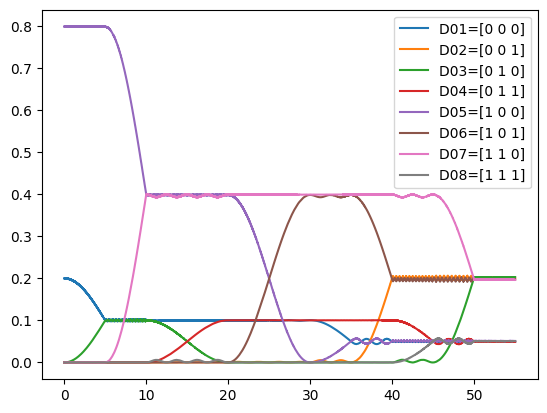

In [16]:
for l in range(2**3):
    if l+1<10:
        plt.plot(T,D_list[l],label=f'D0{l+1}={estados[l]}')
    else:
        plt.plot(T,D_list[l],label=f'D{l+1}={estados[l]}')
plt.legend()


El primer qubit $(\psi)$ podría ser 0 o 1 con probabilidad del 50%
El segundo qubit (A) es en este caso 0, y el tercer qubit (B) es 0 también.

Esto se puede representar como el estado $\ket{\psi_0} = \alpha\ket{000} + \beta\ket{100}$ y se aprecia al inicio de la gráfica, en el tiempo 0.


El primer paso es realizar un entrelazamiento cuántico entre el segundo y tercer qubit, a través de un estado de bell, en este caso el estado $(\beta_{00})$, Esto se puede dividir en secciones por lo que primero es llegar al estado 

$\ket{\psi_1} = \alpha\ket{000} + \alpha\ket{010} + \beta\ket{100} + \beta\ket{110}$ Para lograr esto, se aplicó dos pi/2 pulsos, y se logra obtener exactamente en el segundo 10. Esto implica cambiar del estado 1 al 3 con un pulso pi/2, y luego del 5 al 7 con otro pulso pi/2. 

Después llegar al estado 
$\ket{\psi_2} = \alpha\ket{000} + \alpha\ket{011} + \beta\ket{100} + \beta\ket{111}$ Para lograr esto debemos de aplicar dos pulsos-pi, el primero para pasar del estado 3 al 4, y el segundo del 7 al 8. 

Posteriormente, debemos de aplicar otro controlled-not involucrando ahora si a nuestro primer qubit, para llegar al estado $\ket{\psi_3} = \alpha\ket{000} + \alpha\ket{011} + \beta\ket{110} + \beta\ket{101}$. Esto de igual manera debemos de verlo como dos pulsos pi, siendo aplicados a cada estado de manera individual. El primer pi es aplicado del estado 5 al 7, el segundo es aplicado del estado 8 al 6.

Posteriormente, debemos de aplicar otro controlled-not involucrando ahora si a nuestro primer qubit, para llegar al estado $\ket{\psi_3} = \alpha\ket{000} + \alpha\ket{011} + \beta\ket{110} + \beta\ket{101}$. Esto de igual manera debemos de verlo como dos pulsos pi, siendo aplicados a cada estado de manera individual. El primer pi es aplicado del estado 5 al 7, el segundo es aplicado del estado 8 al 6.

Finalmente debemos aplicar el hadamard para 






Al hacer un entrelazamiento cuántico entre el segundo y tercer qubit. Deberiamos de obtener el siguiente estado quantico
000, 011, 100, 111
DO1  DO4  DO5


In [17]:
W_kj(4, 2), W_kj(7, 5)

(628.3185307179587, 628.3185307179587)

In [18]:
# IF 00, then
(D1[-1], D2[-2])/np.sum((D1[-1], D2[-2]))

array([0.19670698, 0.80329302])

In [19]:
# IF 01, then
(D3[-1], D4[-2])/np.sum((D3[-1], D4[-2]))

array([0.80311804, 0.19688196])

In [20]:
# IF 10, then
(D5[-1], D6[-2])/np.sum((D5[-1], D6[-2]))

array([0.20617833, 0.79382167])

In [21]:
# IF 11, then
(D7[-1], D8[-2])/np.sum((D7[-1], D8[-2]))

array([0.79484526, 0.20515474])

In [22]:
qubit_realization = np.random.choice(['00','01','10','11'])
val_for_qr = 1000

if qubit_realization == '00':
    for i in range(1, val_for_qr):
        D1[-i] = (D1[-val_for_qr-1])/np.sum((D1[-val_for_qr-1], D2[-val_for_qr-1]))
        D2[-i] = (D2[-val_for_qr-1])/np.sum((D1[-val_for_qr-1], D2[-val_for_qr-1]))
        D3[-i] = 0
        D4[-i] = 0 
        D5[-i] = 0
        D6[-i] = 0
        D7[-i] = 0
        D8[-i] = 0
elif qubit_realization == '01':
    for i in range(1, val_for_qr):
        D1[-i] = 0
        D2[-i] = 0
        D3[-i] = (D3[-val_for_qr-1])/np.sum((D3[-val_for_qr-1], D4[-val_for_qr-1]))
        D4[-i] = (D4[-val_for_qr-1])/np.sum((D3[-val_for_qr-1], D4[-val_for_qr-1]))
        D5[-i] = 0
        D6[-i] = 0
        D7[-i] = 0
        D8[-i] = 0
elif qubit_realization == '10':
    for i in range(1, val_for_qr):
        D1[-i] = 0
        D2[-i] = 0
        D3[-i] = 0
        D4[-i] = 0
        D5[-i] = (D5[-val_for_qr-1])/np.sum((D5[-val_for_qr-1], D6[-val_for_qr-1]))
        D6[-i] = (D6[-val_for_qr-1])/np.sum((D5[-val_for_qr-1], D6[-val_for_qr-1]))
        D7[-i] = 0
        D8[-i] = 0
elif qubit_realization == '11':
    for i in range(1, val_for_qr):
        D1[-i] = 0
        D2[-i] = 0
        D3[-i] = 0
        D4[-i] = 0
        D5[-i] = 0
        D6[-i] = 0
        D7[-i] = (D7[-val_for_qr-1])/np.sum((D7[-val_for_qr-1], D8[-val_for_qr-1]))
        D8[-i] = (D8[-val_for_qr-1])/np.sum((D7[-val_for_qr-1], D8[-val_for_qr-1]))

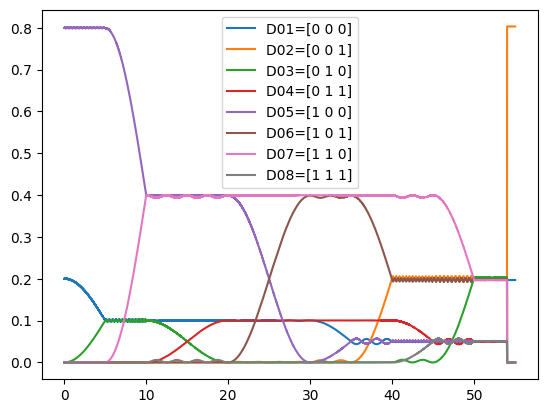

In [23]:
for l in range(2**3):
    if l+1<10:
        plt.plot(T,D_list[l],label=f'D0{l+1}={estados[l]}')
    else:
        plt.plot(T,D_list[l],label=f'D{l+1}={estados[l]}')
plt.legend()

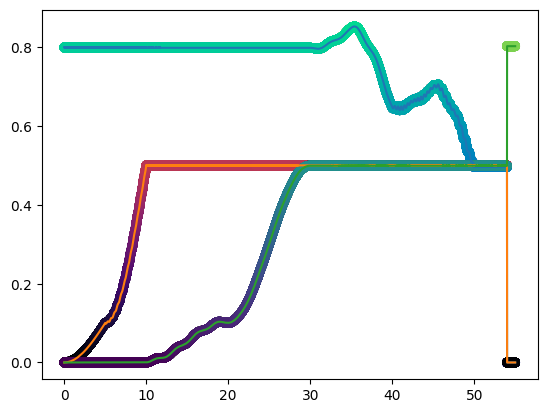

In [24]:
#plt.plot(T, np.sum(np.array([D1, D2, D3, D4]), axis=0))
plt.scatter(
    T, np.sum(np.array([D5, D6, D7, D8]), axis=0), marker='o',
    c=np.sum(np.array([D5, D6, D7, D8]), axis=0),
    vmin=0, vmax=1, cmap='winter'
)
plt.plot(T, np.sum(np.array([D5, D6, D7, D8]), axis=0))


#plt.plot(T, np.sum(np.array([D1, D2, D5, D6]), axis=0))
#plt.plot(T, np.sum(np.array([D3, D4, D7, D8]), axis=0), marker)
plt.scatter(
    T, np.sum(np.array([D3, D4, D7, D8]), axis=0), marker='o',
    c=np.sum(np.array([D3, D4, D7, D8]), axis=0),
    vmin=0, vmax=1, cmap='inferno'
)
plt.plot(T, np.sum(np.array([D3, D4, D7, D8]), axis=0))



plt.scatter(
    T, np.sum(np.array([D2, D4, D6, D8]), axis=0), marker='o',
    c=np.sum(np.array([D2, D4, D6, D8]), axis=0),
    vmin=0, vmax=1, cmap='viridis'
)
#plt.plot(T, np.sum(np.array([D1, D3, D5, D7]), axis=0))
plt.plot(T, np.sum(np.array([D2, D4, D6, D8]), axis=0,))